> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

Importando...

In [56]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',12)

wcwomen_df = pd.read_csv('matches_1991_2023.csv')
wcmen_df   = pd.read_csv('matches_1930_2022.csv')
wc = pd.concat((wcwomen_df,wcmen_df)).reset_index()

nomes_traduzidos = {'home_team': 'time_1', 'away_team': 'time_2', 'home_score': 'gols_1', 'away_score': 'gols_2',
                    'Date': 'data', 'Year': 'ano', 'Host': 'país_sede', 'Attendance': 'comparecimento',
                    'Score': 'resultado', 'Round': 'rodada', 'home_goal': 'gols_1_detalhes', 'away_goal': 'gols_2_detalhes',
                    'home_own_goal': 'gols_1_contra', 'away_own_goal': 'gols_2_contra',
                    'home_penalty_goal': 'gols_1_penalti', 'away_penalty_goal': 'gols_2_penalti',
                    'home_red_card': 'cartao_vermelho_1', 'away_red_card': 'cartao_vermelho_2',
                    'home_yellow_card_long': 'cartao_amarelo_1', 'away_yellow_card_long': 'cartao_amarelo_2'}

wc = wc.loc[:, nomes_traduzidos.keys()]
wc.columns = nomes_traduzidos.values()

copa = wc['ano'].apply( lambda x: 'Masculina' if x % 2 == 0 else 'Feminina').astype('string')
wc['copa'] = copa

# Lista de colunas que serão convertidas para o tipo string
convert_obj_to_str = [
    'time_1', 'time_2', 'país_sede', 'resultado',
    'gols_1_detalhes', 'gols_2_detalhes',
    'gols_1_contra', 'gols_2_contra',
    'gols_1_penalti', 'gols_2_penalti',
    'cartao_vermelho_1', 'cartao_vermelho_2',
    'cartao_amarelo_1', 'cartao_amarelo_2'
]

# Converte as colunas especificadas para o tipo string
wc[convert_obj_to_str] = wc[convert_obj_to_str].astype("string")

# Converte a coluna 'rodada' para o tipo category (ótimo para variáveis categóricas com poucos valores únicos)
wc['rodada'] = wc['rodada'].astype("category")

# Converte a coluna 'data' para o tipo datetime, especificando o formato de entrada
wc['data'] = pd.to_datetime(wc['data'], format='%Y-%m-%d')

# Exibe informações resumidas sobre o DataFrame, incluindo tipos de dados e uso de memória
wc.info()

# Salva o DataFrame transformado em um arquivo CSV
# O parâmetro index=False evita que o índice seja salvo como uma coluna adicional
wc.to_csv('dados_copa_mundo_transformados.csv', index=False)

# Mensagem indicando que o processo foi concluído com sucesso
print("Dados transformados e salvos com sucesso em 'dados_copa_mundo_transformados.csv'")
display(wc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_p

,time_1,time_2,gols_1,gols_2,data,ano,país_sede,comparecimento,resultado,rodada,gols_1_detalhes,gols_2_detalhes,gols_1_contra,gols_2_contra,gols_1_penalti,gols_2_penalti,cartao_vermelho_1,cartao_vermelho_2,cartao_amarelo_1,cartao_amarelo_2,copa
0,Spain,England,1,0,2023-08-20,2023,"Australia, New Zealand",75784,1–0,Final,Olga Carmona · 29’,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,['78’|1:0|Salma Paralluelo'],['55’|1:0|Lauren Hemp'],Feminina
1,Sweden,Australia,2,0,2023-08-19,2023,"Australia, New Zealand",49461,2–0,Third-place match,Kosovare Asllani · 62’,<NA>,<NA>,<NA>,Fridolina Rolfö (P) · 30’,<NA>,<NA>,<NA>,"['88’|2:0|Elin Rubensson', '90+5’|2:0|Lina Hur...",['45+1’|1:0|Katrina Gorry'],Feminina
2,Australia,England,1,3,2023-08-16,2023,"Australia, New Zealand",75784,1–3,Semi-finals,Sam Kerr · 63’,Ella Toone · 36’|Lauren Hemp · 71’|Alessia Rus...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"['10’|0:0|Alex Greenwood', '90+5’|1:3|Chloe Ke...",Feminina
3,Spain,Sweden,2,1,2023-08-15,2023,"Australia, New Zealand",43217,2–1,Semi-finals,Salma Paralluelo · 81’|Olga Carmona · 89’,Rebecka Blomqvist · 88’,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Feminina
4,Australia,France,0,0,2023-08-12,2023,"Australia, New Zealand",49461,(7) 0–0 (6),Quarter-finals,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,['92’|0:0|Katrina Gorry'],<NA>,Feminina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,Argentina,France,1,0,1930-07-15,1930,Uruguay,23409,1–0,Group stage,Luis Monti · 81,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Masculina
1308,Yugoslavia,Brazil,2,1,1930-07-14,1930,Uruguay,24059,2–1,Group stage,Aleksandar Tirnanić · 21|Ivan Bek · 30,Preguinho · 62,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Masculina
1309,Romania,Peru,3,1,1930-07-14,1930,Uruguay,2549,3–1,Group stage,Adalbert Deșu · 1|Constantin Stanciu · 79|Nico...,Luis de Souza Ferreira · 75,<NA>,<NA>,<NA>,<NA>,<NA>,Plácido Galindo · 70,<NA>,<NA>,Masculina
1310,United States,Belgium,3,0,1930-07-13,1930,Uruguay,18346,3–0,Group stage,Bart McGhee · 23|Tom Florie · 45|Bert Patenaud...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Masculina


#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

plt.style.use('dark_background')
sns.set_theme(style="darkgrid")
pio.templates.default = "plotly_dark"


#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

In [58]:
# Removendo o comparecimento 0:
wc_filtrado = wc[wc['comparecimento'] > 0]

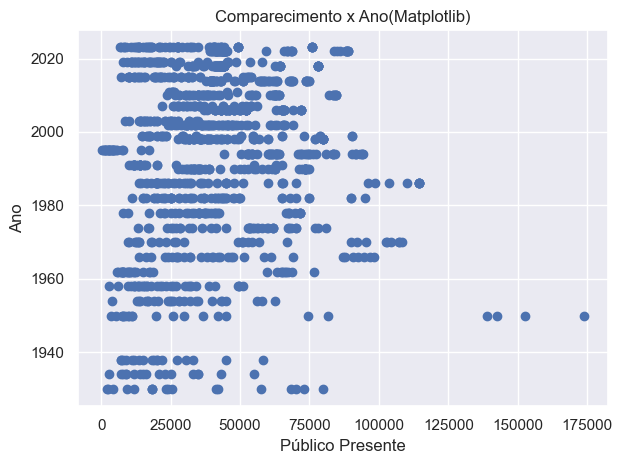

In [59]:
#### Solução com matplotlib
figplt = plt.scatter(wc_filtrado['comparecimento'], wc_filtrado['ano'])
plt.title('Comparecimento x Ano(Matplotlib)')
plt.xlabel('Público Presente')
plt.ylabel('Ano')
plt.tight_layout()
plt.show(figplt)

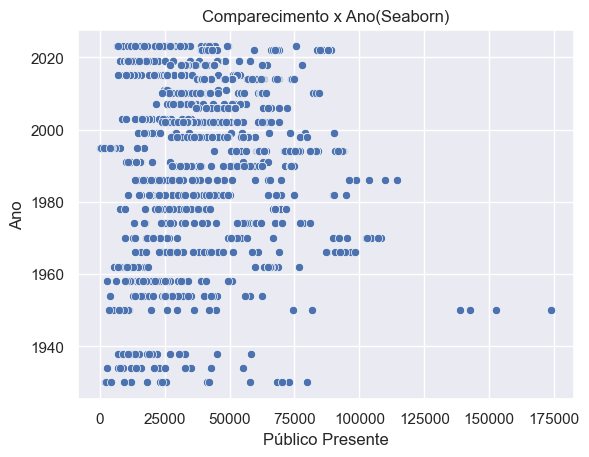

In [60]:
#### solução com seaborn
figsns = sns.scatterplot(x=wc_filtrado['comparecimento'],y=wc_filtrado['ano'])
figsns.set(title='Comparecimento x Ano(Seaborn)', xlabel='Público Presente', ylabel='Ano')
plt.show(figsns)

In [61]:
#### solução com plotly
figpx = px.scatter(x=wc_filtrado['comparecimento'], y=wc_filtrado['ano'])
figpx.update_layout(
    title='Comparecimento x Ano(plotly)',
    xaxis_title='Público Presente',
    yaxis_title='Ano'
)
figpx.show()


#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

In [62]:
import numpy as np
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
display(gols)

,gols_1,gols_2
0,0.693834,0.000000
1,1.926259,0.000000
2,0.055572,0.223433
3,1.326511,0.397617
4,0.000000,0.000000
...,...,...
1307,0.392372,0.000000
1308,1.261717,0.838053
1309,1.129046,0.814070
1310,1.688278,0.000000


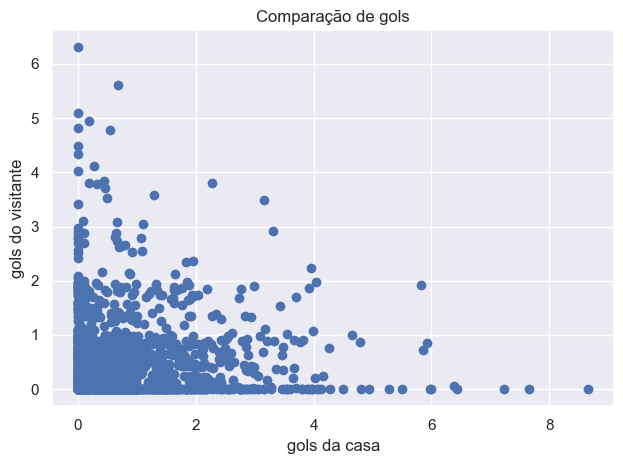

In [63]:
#### solução com matplotlib
golsplt = plt.scatter(gols['gols_1'], gols['gols_2'])
plt.title('Comparação de gols')
plt.xlabel('gols da casa')
plt.ylabel('gols do visitante')
plt.tight_layout()
plt.show(golsplt)

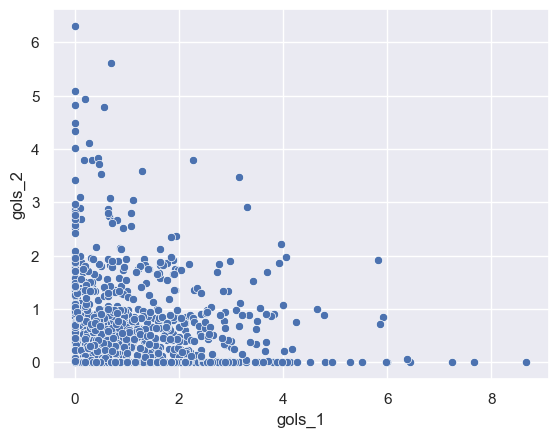

In [64]:
#### solução com seaborn
golssns = sns.scatterplot(x=gols['gols_1'],y=gols['gols_2'])
figsns.set(title='Comparação de gols', xlabel='gols da casa', ylabel='gols do visitante')
plt.show(golssns)


In [65]:
#### solução com plotly
golspx = px.scatter(x=gols['gols_1'],y=gols['gols_2'])
golspx.update_layout(
    title='Comparação de gols',
    xaxis_title='gols da casa',
    yaxis_title='gols do visitante'
)
golspx.show()

#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

In [66]:
# Organização dos países
import pandas as pd
import numpy as np

# Criar DataFrame com todas as participações
todas_partidas = pd.concat([
    wc[['time_1', 'ano']].rename(columns={'time_1': 'país'}),
    wc[['time_2', 'ano']].rename(columns={'time_2': 'país'})
])

# Classificar como Masculina ou Feminina baseado no ano (par/ímpar)
todas_partidas['copa'] = todas_partidas['ano'].apply(
    lambda x: 'Masculina' if x % 2 == 0 else 'Feminina'
)

# Contar participações por país e tipo de copa
participacao = todas_partidas.groupby(['país', 'copa'])['ano'].nunique().reset_index()
participacao = participacao.rename(columns={'ano': 'num_copas'})

# Ordenar por tipo de copa e número de participações
participacao = participacao.sort_values(['copa', 'num_copas'], ascending=[True, False])

# Separar em masculina e feminina
feminina = participacao[participacao['copa'] == 'Feminina'].head(10)
masculina = participacao[participacao['copa'] == 'Masculina'].head(10)

top_copas = pd.concat([feminina,masculina], ignore_index=True)

barra_vertical = {
    "Feminina": feminina['num_copas'].values,
    "Masculina": masculina['num_copas'].values,
}

display(top_copas)

,país,copa,num_copas
0,Brazil,Feminina,9
1,Germany,Feminina,9
2,Japan,Feminina,9
3,Nigeria,Feminina,9
4,Norway,Feminina,9
...,...,...,...
15,France,Masculina,16
16,Spain,Masculina,16
17,Belgium,Masculina,14
18,Uruguay,Masculina,14


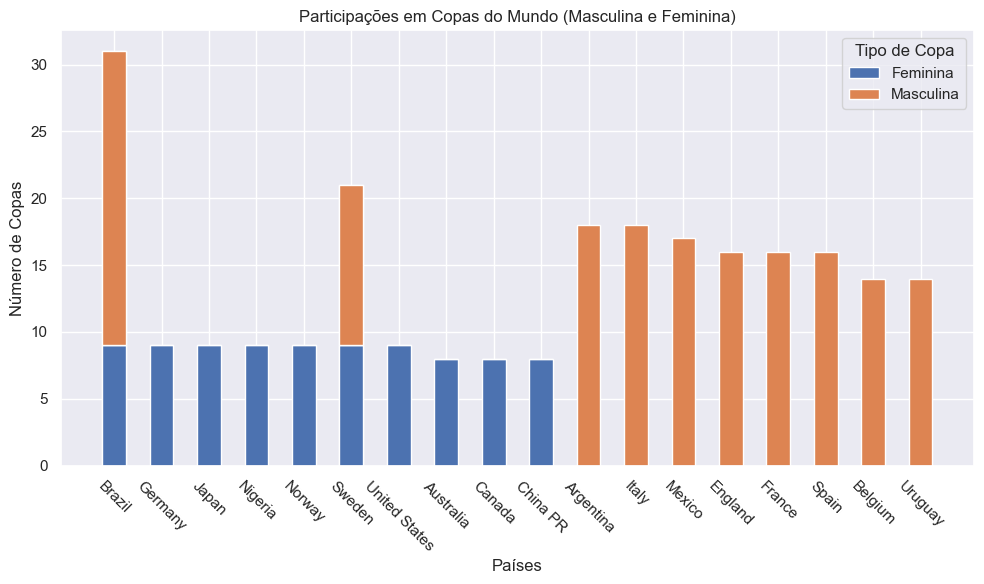

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Inicializando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Variável para controlar a parte inferior de cada barra
bottom = np.zeros(len(top_copas))

# Inicializando arrays de zeros para armazenar os valores das barras
feminina_barras = np.zeros(len(top_copas))
masculina_barras = np.zeros(len(top_copas))

# Preenchendo os arrays de barras com as participações reais, alinhando com os países
for i, pais in enumerate(top_copas['país']):
    if pais in feminina['país'].values:
        feminina_barras[i] = feminina.loc[feminina['país'] == pais, 'num_copas'].values[0]  # Participações femininas
    if pais in masculina['país'].values:
        masculina_barras[i] = masculina.loc[masculina['país'] == pais, 'num_copas'].values[0]  # Participações masculinas

# Gerando as barras empilhadas (Feminina primeiro)
ax.bar(top_copas['país'], feminina_barras, width=0.5, label='Feminina', bottom=bottom)
bottom += feminina_barras  # Atualizando a base para a próxima barra empilhada

# Gerando as barras empilhadas (Masculina depois)
ax.bar(top_copas['país'], masculina_barras, width=0.5, label='Masculina', bottom=bottom)
bottom += masculina_barras  # Atualizando a base para a próxima barra empilhada

# Adicionando rótulos e título
ax.set_xlabel('Países')
ax.set_ylabel('Número de Copas')
ax.set_title('Participações em Copas do Mundo (Masculina e Feminina)')
ax.legend(title="Tipo de Copa")

# Exibindo o gráfico
plt.xticks(rotation=-45)
plt.tight_layout()  # Ajuste de layout para não sobrepor os rótulos
plt.show()


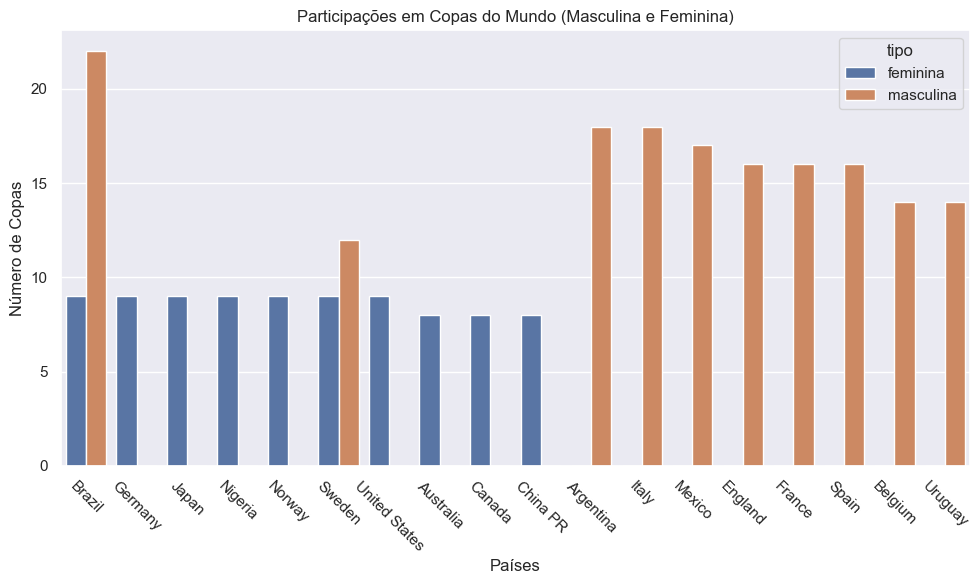

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Criando o DataFrame com os dados das participações
data = {
    'país': top_copas['país'],
    'feminina': feminina_barras,
    'masculina': masculina_barras
}

df = pd.DataFrame(data)

# Transformando os dados para um formato longo (melt)
df_melted = df.melt(id_vars='país', value_vars=['feminina', 'masculina'],
                    var_name='tipo', value_name='num_copas')

# Inicializando o gráfico
plt.figure(figsize=(10, 6))

# Gerando o gráfico com seaborn (barplot com barras empilhadas)
sns.barplot(x='país', y='num_copas', hue='tipo', data=df_melted, errorbar=None)

# Ajustando o título e rótulos
plt.title('Participações em Copas do Mundo (Masculina e Feminina)')
plt.xlabel('Países')
plt.ylabel('Número de Copas')
plt.xticks(rotation=-45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()


In [69]:
#### solução com plotly
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Criando o DataFrame com os dados das participações
data = {
    'país': top_copas['país'],
    'feminina': feminina_barras,
    'masculina': masculina_barras
}

df = pd.DataFrame(data)

# Criando as barras empilhadas
fig = go.Figure()

# Adicionando as barras femininas
fig.add_trace(go.Bar(
    x=df['país'], 
    y=df['feminina'], 
    name='Feminina', 
    marker_color='rgba(255, 99, 132, 0.7)'
))

# Adicionando as barras masculinas
fig.add_trace(go.Bar(
    x=df['país'], 
    y=df['masculina'], 
    name='Masculina', 
    marker_color='rgba(54, 162, 235, 0.7)'
))

# Atualizando o layout para barras empilhadas
fig.update_layout(
    barmode='stack',  # Empilhando as barras
    title='Participações em Copas do Mundo (Masculina e Feminina)',
    xaxis_title='Países',
    yaxis_title='Número de Copas',
    xaxis_tickangle=-45  # Girando os rótulos do eixo X
)

# Exibindo o gráfico
fig.show()


#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

In [70]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import ast

# Criando os subplots (2 linhas, 2 colunas)
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Jogos por Ano', 'Gols por Ano', 'Cartões por Ano', 'Gols Contra por Ano'),
    shared_xaxes=True
)

# Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos por ano
jogos_por_ano = wc['ano'].value_counts().sort_index()
tabela_jogos_por_ano = jogos_por_ano.reset_index()
tabela_jogos_por_ano.columns = ['ano', 'Quantidade de Jogos']
fig.add_trace(go.Bar(
    x=tabela_jogos_por_ano['ano'], 
    y=tabela_jogos_por_ano['Quantidade de Jogos'], 
    name='Jogos', 
    marker_color='rgb(55, 83, 109)'
), row=1, col=1)

# Linha 1, coluna 2: Gráfico de área com o total de gols por ano (gols_1 e gols_2)
fig.add_trace(go.Scatter(
    x=wc['ano'], 
    y=wc['gols_1'] + wc['gols_2'], 
    mode='none', 
    stackgroup='one', 
    name='Total de Gols', 
    fill='tonexty',
    fillcolor='rgba(55, 83, 109, 0.6)'
), row=1, col=2)

# Linha 2, coluna 1: Gráfico de área com o total de cartões por ano


# Função para contar cartões (lida com NaN e listas em string)
def contar_cartoes(lista_str):
    if pd.isna(lista_str) or lista_str.strip() == "":
        return 0
    try:
        return len(ast.literal_eval(lista_str))
    except (ValueError, SyntaxError):
        return 0

# Contar cartões amarelos a partir das listas
wc['cartoes_amarelos_1'] = wc['cartao_amarelo_1'].apply(contar_cartoes)
wc['cartoes_amarelos_2'] = wc['cartao_amarelo_2'].apply(contar_cartoes)

# Contar cartões vermelhos: 1 se houver valor, 0 se NaN
wc['cartoes_vermelhos_1'] = wc['cartao_vermelho_1'].notna().astype(int)
wc['cartoes_vermelhos_2'] = wc['cartao_vermelho_2'].notna().astype(int)

# Criar colunas de total por jogo
wc['cartoes_amarelos'] = wc['cartoes_amarelos_1'] + wc['cartoes_amarelos_2']
wc['cartoes_vermelhos'] = wc['cartoes_vermelhos_1'] + wc['cartoes_vermelhos_2']

# Agrupar por ano
cartoes_ano = wc.groupby('ano')[['cartoes_amarelos', 'cartoes_vermelhos']].sum().reset_index()

# Gráfico de cartões amarelos
fig.add_trace(go.Scatter(
    x=cartoes_ano['ano'], 
    y=cartoes_ano['cartoes_amarelos'], 
    mode='lines',
    name='Cartões Amarelos', 
    fill='tozeroy',
    fillcolor='rgba(255, 223, 0, 0.6)',
    line=dict(color='rgba(255, 223, 0, 1)')
), row=2, col=1)

# Gráfico de cartões vermelhos
fig.add_trace(go.Scatter(
    x=cartoes_ano['ano'], 
    y=cartoes_ano['cartoes_vermelhos'], 
    mode='lines',
    name='Cartões Vermelhos', 
    fill='tozeroy',
    fillcolor='rgba(255, 0, 0, 0.5)',
    line=dict(color='rgba(255, 0, 0, 1)')
), row=2, col=1)

# Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano
wc['gols_1_contra'] = pd.to_numeric(wc['gols_1_contra'], errors='coerce')
wc['gols_2_contra'] = pd.to_numeric(wc['gols_2_contra'], errors='coerce')

# Criando uma nova coluna com a soma dos gols contra
wc['gols_contra_total'] = wc['gols_1_contra'] + wc['gols_2_contra']

# Removendo as linhas onde os valores de gols contra são NaN
wc_sem_nan = wc.dropna(subset=['gols_contra_total'])

# Agrupando por ano e somando os gols contra
gols_contra_ano = wc_sem_nan.groupby('ano')['gols_contra_total'].sum().reset_index()

# Gráfico de barras com a soma dos gols contra por ano
fig.add_trace(go.Bar(
    x=gols_contra_ano['ano'], 
    y=gols_contra_ano['gols_contra_total'], 
    name='Gols Contra', 
    marker_color='rgb(231, 76, 60)'
), row=2, col=2)


# Atualizando o layout
fig.update_layout(
    title='Estatísticas Históricas das Copas do Mundo',
    showlegend=True,
    height=800,
    width=1000,
    xaxis_title='Ano',
    yaxis_title='Quantidade',
    barmode='stack',
    xaxis_tickangle=-45
)

# Exibindo o gráfico
fig.show()
